<a href="https://colab.research.google.com/github/Sereniiti/ai-models/blob/main/Ngrams_Sentiment_analysis_model_binary_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard 
import os, datetime 

In [21]:
nltk.download ("stopwords")

import matplotlib.pyplot as plt
!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
df = pd.read_csv('/content/drive/MyDrive/Training data (sentences) - Dataset.csv')
df.head ()

,en,fr,rating,Step,Tips in the steps (WIP),Alert,Comment
0,A 2014 study examined the effects of combined ...,Une étude de 2014 a examiné les effets d'une f...,4,facts,factual,NaN,NaN
1,Boys don't cry,Un grand garçon ne pleure pas,2,facts,"judgement, generalization, label",NaN,NaN
2,"A cheetah, the fastest land animal, can run 70...","Un guépard, l'animal terrestre le plus rapide,...",4,facts,factual,NaN,NaN
3,A combination of words that makes sense is cal...,Une combinaison de mots qui a un sens complet ...,4,facts,factual,NaN,NaN
4,A door would have more charisma than you,Une porte aurait plus de charisme que toi,0,facts,"judgement, generalization, label",NaN,NaN


In [24]:
df=df.drop(['fr', 'Step', 'Tips in the steps (WIP)', 'Alert', 'Comment',],axis=1)
df.dropna(inplace=True)

In [25]:
df

,en,rating
0,A 2014 study examined the effects of combined ...,4
1,Boys don't cry,2
2,"A cheetah, the fastest land animal, can run 70...",4
3,A combination of words that makes sense is cal...,4
4,A door would have more charisma than you,0
...,...,...
10988,it was violent and gratuitous it was mean,1
10989,You say that but I assure you that in normal c...,1
10990,You really went too far,1
10991,It was mean,1


In [26]:
df ['Violence_Rating']=df ['rating'].apply(lambda x: 0 if x >= 4 else 1)

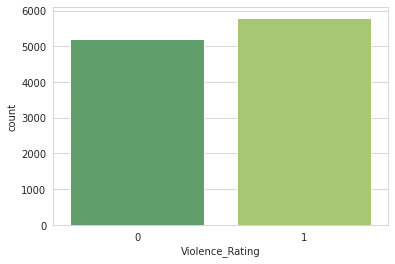

In [27]:
sns.set_style ('whitegrid')
sns.countplot (x='Violence_Rating', data=df, palette='summer')

In [28]:
def get_text_processing(text):
    stpword = ['the','a', 'an']
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [29]:
df['en_processed'] = df['en'].apply(get_text_processing)
df.head()

,en,rating,Violence_Rating,en_processed
0,A 2014 study examined the effects of combined ...,4,0,2014 study examined effects of combined NVC an...
1,Boys don't cry,2,1,Boys dont cry
2,"A cheetah, the fastest land animal, can run 70...",4,0,cheetah fastest land animal can run 70 miles hour
3,A combination of words that makes sense is cal...,4,0,combination of words that makes sense is calle...
4,A door would have more charisma than you,0,1,door would have more charisma than you


In [30]:
df = df[['en_processed', 'Violence_Rating']]
df.head()

,en_processed,Violence_Rating
0,2014 study examined effects of combined NVC an...,0
1,Boys dont cry,1
2,cheetah fastest land animal can run 70 miles hour,0
3,combination of words that makes sense is calle...,0
4,door would have more charisma than you,1


In [31]:
dft = df.sample (n=10000, random_state=100)
dfr = df.drop (dft.index)
dfr

,en_processed,Violence_Rating
2,cheetah fastest land animal can run 70 miles hour,0
6,group of words which makes complete sense is c...,0
7,little hello and kiss from our son,0
18,According to this article volcanoes in Auvergn...,0
32,After long hot night we spent together I feel ...,0
...,...,...
10863,I am only doing this for you,1
10897,You should go out more,1
10917,You think you dont need anyone but in fact you...,1
10963,I love you as big as truck,0


In [32]:
dft

,en_processed,Violence_Rating
3305,Im good at English grammar,0
5410,We have received confirmation that this attack...,0
7475,You think youre alone in world,1
4573,Now that I know that I am selected I feel much...,0
1139,He thinks hes only one with something interest...,1
...,...,...
2502,I love you much more than you love me,1
6304,You are not good husband,1
3733,Im really unhappy with my life,0
3178,Im feeling very tired,0


In [33]:
X1 = dft["en_processed"].values
X2= dfr["en_processed"].values
X3= dfr["en_processed"].values
Y1= dft.drop("en_processed", axis=1).values
Y2= dfr.drop("en_processed", axis=1).values
X1_train, X1_test, Y1_train, Y1_test=train_test_split(X1,Y1, test_size=0.30, random_state=42)


In [34]:
dfffff = pd.DataFrame (X1)
dfffff

,0
0,Im good at English grammar
1,We have received confirmation that this attack...
2,You think youre alone in world
3,Now that I know that I am selected I feel much...
4,He thinks hes only one with something interest...
...,...
9995,I love you much more than you love me
9996,You are not good husband
9997,Im really unhappy with my life
9998,Im feeling very tired


In [35]:
vect = CountVectorizer(analyzer='word', ngram_range=(1, 3))
X1_train = vect.fit_transform (X1_train)
X1_test = vect.transform(X1_test)
X2= vect.transform(X2)
X2

<993x58405 sparse matrix of type '<class 'numpy.int64'>'
	with 11944 stored elements in Compressed Sparse Row format>

In [36]:
tfidf = TfidfTransformer()
X1_train = tfidf.fit_transform(X1_train)
X1_test = tfidf.transform(X1_test)
X1_train = X1_train.toarray()
X1_test = X1_test.toarray()
X2= tfidf.fit_transform (X2)
X2= X2.toarray ()

In [37]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense (units = 20, kernel_initializer= 'uniform', activation= 'relu'))
model.add(tf.keras.layers.Dense (units = 20, kernel_initializer= 'uniform', activation= 'relu'))
model.add(tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model.compile (optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=2)

In [18]:




#Notice that since we set patience=5, we won’t get the best model, but the model two epochs after the best model. 
#==> An additional callback is required that saves the best model observed during training. This is the ModelCheckpoint callback 



In [38]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5) #which quantity to monitor to decide early stopping 

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) 

callbacks = [early_stopping, ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True), 
TensorBoard(logdir, histogram_freq=1)] 

history = model.fit( 
X1_train, 
Y1_train, 
epochs=200, 
validation_split=0.25, 
batch_size=40, 
verbose=2, 
callbacks=[callbacks] 
)

Epoch 1/200
132/132 - 4s - loss: 0.6747 - accuracy: 0.5594 - val_loss: 0.5990 - val_accuracy: 0.7400
Epoch 2/200
132/132 - 3s - loss: 0.3512 - accuracy: 0.9189 - val_loss: 0.2950 - val_accuracy: 0.8954
Epoch 3/200
132/132 - 3s - loss: 0.0821 - accuracy: 0.9825 - val_loss: 0.2427 - val_accuracy: 0.9091
Epoch 4/200
132/132 - 3s - loss: 0.0253 - accuracy: 0.9962 - val_loss: 0.2343 - val_accuracy: 0.9109
Epoch 5/200
132/132 - 3s - loss: 0.0111 - accuracy: 0.9990 - val_loss: 0.2338 - val_accuracy: 0.9137
Epoch 6/200
132/132 - 3s - loss: 0.0062 - accuracy: 0.9994 - val_loss: 0.2347 - val_accuracy: 0.9109
Epoch 7/200
132/132 - 3s - loss: 0.0039 - accuracy: 0.9996 - val_loss: 0.2367 - val_accuracy: 0.9109
Epoch 8/200
132/132 - 3s - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.2392 - val_accuracy: 0.9114
Epoch 9/200
132/132 - 3s - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.2407 - val_accuracy: 0.9126
Epoch 10/200
132/132 - 3s - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.2432 - val_accura

In [39]:
from keras.models import load_model 
saved_model = load_model('best_model.h5') 
test_acc = saved_model.evaluate(X1_test, Y1_test)

94/94 [==============================] - 1s 6ms/step - loss: 0.2691 - accuracy: 0.9053


In [ ]:
preds = model.predict(X1_test)

dfp = pd.DataFrame (preds)
dfp

,0
0,1.000000e+00
1,9.846383e-01
2,9.995518e-01
3,6.463219e-14
4,2.045932e-01
...,...
2995,9.035473e-01
2996,3.995803e-11
2997,9.764816e-01
2998,1.162422e-05


In [40]:
predss = saved_model.predict (X2)
predss


array([[7.91461766e-02],
       [1.42932832e-02],
       [2.72127688e-02],
       [3.30756485e-01],
       [3.24952602e-03],
       [1.14732265e-01],
       [9.73254442e-03],
       [1.94948673e-01],
       [1.60041630e-01],
       [2.96385586e-02],
       [9.98440981e-01],
       [9.99511838e-01],
       [9.99846816e-01],
       [2.09621191e-02],
       [1.28945708e-03],
       [8.25303555e-01],
       [9.99895692e-01],
       [1.48293614e-01],
       [2.74187326e-03],
       [3.34963202e-03],
       [3.97267938e-03],
       [8.18394542e-01],
       [9.99816895e-01],
       [3.89468670e-03],
       [1.51292086e-02],
       [7.44479239e-01],
       [4.24483418e-03],
       [7.92235136e-03],
       [8.24702978e-01],
       [2.43565053e-01],
       [2.66887248e-02],
       [9.94838715e-01],
       [8.44536722e-01],
       [5.72213531e-03],
       [9.92965400e-01],
       [2.42651105e-02],
       [9.45454240e-02],
       [4.20352548e-01],
       [1.03842318e-02],
       [7.95617700e-03],


In [41]:


DFN = np.c_[X3, Y2, predss]

dfz = pd.DataFrame (DFN)
dfz

,0,1,2
0,cheetah fastest land animal can run 70 miles hour,0,0.0791462
1,group of words which makes complete sense is c...,0,0.0142933
2,little hello and kiss from our son,0,0.0272128
3,According to this article volcanoes in Auvergn...,0,0.330756
4,After long hot night we spent together I feel ...,0,0.00324953
...,...,...,...
988,I am only doing this for you,1,0.490763
989,You should go out more,1,0.999383
990,You think you dont need anyone but in fact you...,1,0.997731
991,I love you as big as truck,0,0.741138


In [42]:
dfz.to_csv(r'/content/drive/MyDrive/final_table7NGrams.csv', index = False)